In [67]:
# We import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# We make graphs appear on the notebook
%matplotlib inline

In [69]:
# We import the database. It is a csv, so we will use pandas to read it.
df = pd.read_csv('medallas.csv', encoding = 'latin-1')

In [70]:
# We analyze what does the Database look like.
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [71]:
# How many total data exist?
df.count()

City            15316
Year            15316
Sport           15316
Discipline      15316
Event           15316
Athlete         15316
Gender          15316
Country_Code    15316
Country         15316
Event_gender    15316
Medal           15316
dtype: int64

## Exercise 1

In [72]:
# We create a pd.Series object with the years column of the dataset.
series = pd.Series(df['Year'])
print(series)
# It works as intended.

0        1976.0
1        1976.0
2        1976.0
3        1976.0
4        1976.0
          ...  
15428    2008.0
15429    2008.0
15430    2008.0
15431    2008.0
15432    2008.0
Name: Year, Length: 15433, dtype: float64


## Exercise 2

In [73]:
# We generate new columns for the splitted names and surnames of the athletes
df['Athlete_surname'] = df['Athlete'].str.split(",", n = 1, expand = True)[0]
df['Athlete_name'] = df['Athlete'].str.split(",", n = 1, expand = True)[1]

In [74]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Athlete_surname,Athlete_name
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,KÖHLER,Christa
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,KOSENKOV,Aleksandr
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,BOGGS,Philip George
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,CAGNOTTO,Giorgio Franco
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,WILSON,Deborah Keplar


## Exercise 3

In [75]:
# We can obtain a summary of the data with the Describe method.
df['Country'].describe()

count             15316
unique              127
top       United States
freq               1992
Name: Country, dtype: object

In [76]:
# Also, we can Transpose and describe
df['Event'].describe()

count      15316
unique       293
top       hockey
freq         817
Name: Event, dtype: object

In [77]:
df['Event_gender'].describe()

count     15316
unique        3
top           M
freq       8817
Name: Event_gender, dtype: object

In [78]:
print("En función de las estadísticas descriptivas el país que ganó más medallas es Estados Unidos, con 1992 medallas.")

En función de las estadísticas descriptivas el país que ganó más medallas es Estados Unidos, con 1992 medallas.


## Exercise 4

In [79]:
# We create a new dataframe with only the men won medals.
print(df['Event_gender'].value_counts())

M    8817
W    5773
X     726
Name: Event_gender, dtype: int64


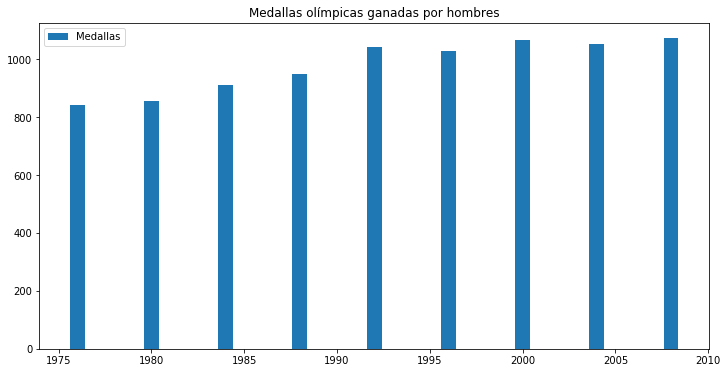

In [94]:
# We first create a new Dataframe only built with 
df['Male'] = df['Event_gender'] == "M"
df2 = df[df.Male]
df3 = df2.groupby('Year').sum()
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,6))
ax.bar(df3.index, df3['Male'], label = "Medallas")
ax.set_title('Medallas olímpicas ganadas por hombres')
ax.legend()

In [91]:
df3.columns

Index(['Male'], dtype='object')